# Laboratorio 4: Spark y EDA 🐼

<center><strong>MDS7202: Laboratorio de Programación Científica para Ciencia de Datos</strong></center>

### Cuerpo Docente:

- Profesores: Ignacio Meza, Sebastián Tinoco
- Auxiliar: Catherine Benavides
- Ayudante: Nicolás Ojeda, Eduardo Moya

### Equipo: SUPER IMPORTANTE - notebooks sin nombre no serán revisados

- Nombre de alumno 1: Tomás Guzmán  
- Nombre de alumno 2: Fabián Palma


### **Link de repositorio de GitHub:** `https://github.com/tomasfabianMDS/LABS.git`

### Reglas:

- **Grupos de 2 personas**
- Fecha de entrega: 7 días desde la publicación, 3 días de atraso con 1 punto de descuento c/u.
- Instrucciones del lab el viernes a las 16:15 en formato online. Asistencia no es obligatoria.
- <u>Prohibidas las copias</u>. Cualquier intento de copia será debidamente penalizado con el reglamento de la escuela.
- Tienen que subir el laboratorio a u-cursos Y a su repositorio de github. Labs que no estén en u-cursos no serán revisados. Recuerden que el repositorio también tiene nota.
- Cualquier duda fuera del horario de clases al foro. Mensajes al equipo docente serán respondidos por este medio.
- Pueden usar cualquer material del curso que estimen conveniente.

### Temas a tratar

- Introducción al manejo de datos tabulares por medio de la libreria `pandas`.

### Objetivos principales del laboratorio

- Entender, aplicar y aprovechar las ventajas que nos ofrece la libreria `pyspark` para manejar datos tabulares de gran volúmen.
- Crear gráficos para el desarrollo de Análisis de Datos Exploratorios (EDA).

### Datos del Lab

- Base de datos: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet
- Objeto serializado: https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl?inline=false

## Preguntas Teóricas [12 puntos]
(2 por pregunta)

<center>
<img src="https://img.buzzfeed.com/buzzfeed-static/static/2018-08/1/17/enhanced/buzzfeed-prod-web-05/anigif_enhanced-9173-1533160033-1.gif" width=350 />



Responda en  máximo 5 líneas las siguientes preguntas:
1. ¿Qué es Apache Spark y cuáles son sus principales ventajas sobre Pandas?
2. ¿Qué es un RDD en Spark? Describe una de sus principales características. ¿Qué tienen que ver con los dataframes?.
3. Diferencia entre transformaciones y acciones en Spark. Proporciona ejemplos de cada una. ¿Qué ocurre internamente cuando se ejecuta una acción?
4. Explica la importancia del particionamiento en Spark y cómo afecta el rendimiento del procesamiento de datos.
5. ¿Cuáles son las funciones de Spark Driver y Spark Executor?
6. ¿Qué es el Catalyst Optimizer en Apache Spark y cuál es su función principal en la optimización de consultas SQL?


**Respuestas**

1. Apache Spark es un framework de procesamiento de datos en memoria y distribuido. La principal ventaja con respecto a pandas precisamente es el procesamiento distribuido, pues tiene la capacidad de manejar conjuntos de datos más grandes. También tiene soporte para varias fuentes de datos y tipos de operaciones.

2. Un RDD en Spark es una colección inmutable y distribuida de elementos que pueden ser operados en paralelo. Una de sus principales características es la tolerancia a los fallos, es decir, que pueden reconstruirse si un nodo falla gracias a esta distribución. La relación con los dataframes es que estos están construidos sobre los RDDs y permiten una abstracción de datos más estructurada y fácil de usar.

3. Las transformaciones en Spark son operaciones que generan un nuevo conjunto de datos a partir de uno existente, pero no se ejecutan de inmediato (ejemplo: map, filter). Las acciones, por otro lado, desencadenan la ejecución de las transformaciones y devuelven un resultado al programa del usuario (ejemplo: collect, count). Cuando se ejecuta una acción, Spark genera un grafo de ejecución DAG y lo optimiza antes de ejecutarlo en el clúster.

4. El particionamiento en Spark consiste en dividir los datos en fragmentos más pequeños, la idea es procesarlos en paralelo por los nodos del clúster. Un buen particionamiento puede mejorar el rendimiento, minimizando la transferencia de datos entre nodos y distribuyendo la carga de trabajo. También permite optimizar operaciones de join y agregación, agrupando los datos relevantes en la misma partición.

5. El Spark Driver es el proceso principal responsable de la ejecución del programa de Spark, coordina las operaciones y gestiona los recursos en el clúster. Los Spark Executors son los procesos que ejecutan las tareas individuales dentro del clúster, gestionan la memoria y realizan cálculos en los datos.

6. El Catalyst Optimizer se encarga de optimizar las consultas SQL y expresiones dataframe para mejorar el rendimiento. Utiliza técnicas como la poda de árboles de expresiones y la reescritura de consultas para generar planes de ejecución eficientes, aprovechando características como el particionamiento y la distribución de datos para minimizar el tiempo de procesamiento.



## Parte Práctica



<center>
<img src="https://pbs.twimg.com/ad_img/1285681293590749189/kDckYy6Z?format=png&name=900x900" width=350 />

Juan Carlos Bodoque, el famoso periodista y empresario, decidió diversificar su portafolio de negocios y crear su propia plataforma de e-commerce. Después de varios años de investigar y analizar el mercado financiero, finalmente logró fundar Bodoque E-Shop con el objetivo de ofrecer a sus clientes una experiencia personalizada y confiable en sus transacciones.

Sin embargo, con la llegada de los aliens al planeta Tierra, aparecen nuevos desafíos para el negocio. Por ello, Bodoque decide invertir en un equipo de expertos en tecnología y comercio interplanetario, para que Bodoque Shop implemente las últimas innovaciones en servicio al cliente para garantizar la satisfacción y fidelización de sus nuevos clientes.

El primer objetivo de Bodoque E-Shop será la hacer un análisis exploratorio para entender mejor el comportamiento de los usuarios en la plataforma. Para ello Bodoque les hace entrega de un extenso dataset en el que se registran las actividades que han realizado sus clientes durante los últimos meses. A continuación se presenta un diccionario de variables que levanto el equipo de consultores interplanetarios de Bodoque:

1. `Transaction ID`: A unique identifier for each transaction.
2. `Customer ID`: A unique identifier for each customer.
3. `Transaction Amount`: The total amount of money exchanged in the transaction in USD.
4. `Transaction Date`: The date and time when the transaction took place.
5. `Payment Method`: The method used to complete the transaction (e.g., credit card, PayPal, etc.).
6. `Product Category`: The category of the product involved in the transaction.
7. `Quantity`: The number of products involved in the transaction.
8. `Customer Age`: The age of the customer making the transaction.
9. `Customer Location`: The geographical location of the customer.
10. `Device Used`: The type of device used to make the transaction (e.g., mobile, desktop).
11. `IP Address`: The IP address of the device used for the transaction.
Shipping Address: The address where the product was shipped.
12. `Billing Address`: The address associated with the payment method.
13. `Is An Alien`: A binary indicator of whether customer is an alien.
14. `Account Age Days`: The age of the customer's account in days at the time of the transaction.
15. `Transaction Hour`: The hour of the day when the transaction occurred.


### Importamos librerias utiles y cargamos los datos😸

In [1]:
!pip install pyspark
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=d574a7ed51fca22742b27a7186d91b5401143f9b4ba64543e86cdf9420132a45
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [2]:
# Libreria Core del lab.
import pyspark
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.types import StringType, IntegerType, FloatType


#Libreria para plotear
!pip install --upgrade plotly
!pip install missingno
import matplotlib.pyplot as plt
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 45.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


Cargue los datos usando **pyspark**

In [6]:
# Importar librerías necesarias
import os
import requests

# Descargar el archivo Parquet
data_url = "https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/datos_lab_spark.parquet"
file_path = "/content/datos_lab_spark.parquet"

# Verificar si el archivo ya existe
if not os.path.exists(file_path):
    # Descargar el archivo
    response = requests.get(data_url)
    with open(file_path, 'wb') as f:
        f.write(response.content)
    print("Archivo descargado correctamente.")
else:
    print("El archivo ya existe en el sistema.")

# Cargar los datos desde el archivo Parquet
df = spark.read.parquet(file_path)

# Mostrar el esquema y las primeras filas del DataFrame
df.printSchema()
df.show(5)

Archivo descargado correctamente.
root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+-----------------

### 2. Limpieza con pyspark [8 puntos]
(1 punto por pregunta)

<center>
<img src="https://miro.medium.com/v2/resize:fit:600/1*A6PpTrehGLxCJWNcUsDTNg.jpeg" width=350 />



Para comenzar con el análisis exploratorio usted decide empezar limpiando la base de datos con **pyspark** dado el alto volumen de datos que genera diariamente Bodoque E-Shop.

**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**



1.   Utilice `.printSchema()` para revisar la estructura de los datos
2.   Muestre las primeras 10 filas del dataset. Hint: utilice `.show()`
3.   Imprima un muestreo aleatorio con el 5% de los datos diponibles. . Hint: utilice `.sample()`
4. Revise los tipos de datos de cada columna con `.dtypes()` y responda la siguiente pregunta: ¿Cuál/es columna/s tiene/n un tipo de dato que no es el adecuado y por qué?
5. Complete el código entregado para cambiar el tipo de datos para la/s columna/s problemáticas.
6. Cuente la cantidad de datos nulos por variable. Recuerde que Spark no posee un método que le permita calcular directamente los nulos.
7. Elimine datos nulos.
8. Elimine datos duplicados.


In [9]:
# Importar las funciones necesarias
from pyspark.sql.functions import col, count, when, isnan

# 1. Revisar la estructura de los datos
df.printSchema()

# 2. Mostrar las primeras 10 filas del dataset
df.show(10)

# 3. Mostrar un muestreo aleatorio del 5% de los datos
sample_df = df.sample(withReplacement=False, fraction=0.05, seed=42)
sample_df.show()

# 4. Revisar los tipos de datos de cada columna
column_types = df.dtypes
print(column_types)

# 5. Cambiar el tipo de datos para la/s columna/s problemáticas
# En este caso, parece que la columna "Is An Alien" debería ser de tipo IntegerType en lugar de DoubleType
from pyspark.sql.types import IntegerType
df = df.withColumn("Is An Alien", col("Is An Alien").cast(IntegerType()))

# 6. Contar la cantidad de datos nulos por variable
null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])
null_counts.show()

# 7. Eliminar datos nulos
df = df.dropna()

# 8. Eliminar datos duplicados
df = df.dropDuplicates()

root
 |-- Transaction ID: string (nullable = true)
 |-- Customer ID: string (nullable = true)
 |-- Transaction Amount: double (nullable = true)
 |-- Transaction Date: timestamp_ntz (nullable = true)
 |-- Payment Method: string (nullable = true)
 |-- Product Category: string (nullable = true)
 |-- Quantity: double (nullable = true)
 |-- Customer Age: double (nullable = true)
 |-- Customer Location: string (nullable = true)
 |-- Device Used: string (nullable = true)
 |-- IP Address: string (nullable = true)
 |-- Shipping Address: string (nullable = true)
 |-- Billing Address: string (nullable = true)
 |-- Is An Alien: double (nullable = true)
 |-- Account Age Days: double (nullable = true)
 |-- Transaction Hour: double (nullable = true)

+--------------------+--------------------+------------------+-------------------+--------------+----------------+--------+------------+-----------------+-----------+---------------+--------------------+--------------------+-----------+----------------+-

### 3. Transformaciones con pyspark [6 puntos]
(1 punto por pregunta)

<center>
<img src="https://live.staticflickr.com/13/91801406_0e71d7f019_b.jpg" width=350 />



**Nota: NO SE PERMITE EL USO DE PANDAS EN ESTA SECCIÓN**

Para continuar con el análisis, los especistas de Bodoque les gustaría tener nuevas variables disponibles. Tras las notas de la reunión usted llega a la conclusión de que tiene que realizar las siguientes tareas (con el dataset preprocesado de la seccion anterior):


1.   Agregar una columna llamada "Transaction bp" con el **monto total** de la transacción en bodoque pesos. Se considera que $x$ dólares equivalen a $log(48+|x^{36}|)$ bodoque pesos.
2.   Crear una columna llamada "Transaction Month" con el mes en que se realiza una transacción.
3.   Crear la variable *Type of purchase* según la catidad de unidades vendidas de acuerdo a las siguientes categorías.
  * Compra minorista: 5 productos o menos.
  * Compra mayorista: 6 produtos o más.
4. Imprima los registros de compras hechas por alienígenas en el comecio mayorista.  Utilice `.filter()`.
5. Cuente la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas. Utilice `.groupby()`.
6. Muestre una tabla con la recaudación promedio por transacción para cada método de pago, tanto para humanos como alienígenas. Utilice `pivot()`.

In [11]:
from pyspark.sql.functions import col, log, month, when

# 1. Agregar una columna "Transaction_bp" con el monto total de la transacción en bodoque pesos
df = df.withColumn("Transaction_bp", log(48 + col("Transaction Amount") * 36))

# 2. Crear una columna "Transaction Month" con el mes en que se realiza una transacción
df = df.withColumn("Transaction Month", month("Transaction Date"))

# 3. Crear la variable "Type of purchase" según la cantidad de unidades vendidas
df = df.withColumn("Type of purchase", when(col("Quantity") <= 5, "Compra minorista").otherwise("Compra mayorista"))

# 4. Imprimir los registros de compras hechas por alienígenas en el comercio mayorista
alien_wholesale = df.filter((col("Is An Alien") == 1) & (col("Type of purchase") == "Compra mayorista"))
alien_wholesale.show()

# 5. Contar la cantidad de compras realizadas por humanos y la cantidad de compras realizadas por alienígenas
purchase_counts = df.groupBy("Is An Alien").count()
purchase_counts.show()

# 6. Mostrar una tabla con la recaudación promedio por transacción para cada método de pago
average_revenue = df.groupBy("Payment Method", "Is An Alien").avg("Transaction Amount")
average_revenue.show()

# Pivoteo de la tabla para mostrar la recaudación promedio por método de pago para humanos y alienígenas
average_revenue_pivot = average_revenue.groupBy("Payment Method").pivot("Is An Alien").avg("avg(Transaction Amount)")
average_revenue_pivot.show()

+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
|Transaction ID|Customer ID|Transaction Amount|Transaction Date|Payment Method|Product Category|Quantity|Customer Age|Customer Location|Device Used|IP Address|Shipping Address|Billing Address|Is An Alien|Account Age Days|Transaction Hour|Transaction_bp|Transaction Month|Type of purchase|
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+-----------------+-----------+----------+----------------+---------------+-----------+----------------+----------------+--------------+-----------------+----------------+
+--------------+-----------+------------------+----------------+--------------+----------------+--------+------------+---------------

### 4. EDA [18 puntos]
(1 punto por gráfico y 1 punto por su interpretación)

<center>
<img src="https://i.pinimg.com/originals/41/7e/7b/417e7b9089bcc20c4909df8954c6e742.gif" width=400 />



Esta sección tiene como objetivo evaluar su habilidad para generar reportes y conclusiones a partir de los patrones identificados en los datos proporcionados por Bodoque. Específicamente, se enfoca en **caracterizar las transacciones** y **explorar las diferencias y similitudes en el comportamiento de humanos y aliens**. Utilice el dataset que ya incluye las transformaciones necesarias.

Por favor, asegúrese de que **todas** las visualizaciones que realice cumplan con los siguientes criterios:
- Deben ser relevantes y fáciles de interpretar.
- Cada gráfico debe incluir un título claro, nombres en los ejes y leyendas adecuadas.
- Adjunte una breve descripción interpretativa junto a cada gráfico para explicar los resultados visualizados.

Para llevar a cabo esta tarea, siga los siguientes pasos utilizando la librería de visualización de su elección (matplotlib, seaborn, plotly, etc):

1. **Conversión del DataFrame a formato pandas**: Pase el DataFrame procesado a formato pandas. Evite realizar transformaciones adicionales con pandas.
2. **Visualización de Variables Categóricas**:
   - Genere **tres gráficos de barras** que diferencien entre humanos y aliens. Analice y comente cualquier diferencia o similitud observada entre estos dos grupos.
3. **Visualización de Variables Numéricas**:
   - Elabore **tres distplots** para examinar las distribuciones de variables numéricas, diferenciando entre humanos y aliens. Comente las diferencias o similitudes notables.
4. **Análisis de Patrones en Transacciones**:
   - Cree **tres gráficos avanzados** que ayuden a identificar patrones en las transacciones. Estos gráficos deben incorporar al menos dos dimensiones y diferir de los anteriores. Algunos ejemplos podrían ser un lineplot que muestre la cantidad de transacciones mensuales por canal de venta, o un barplot que exhiba los tres productos más vendidos por canal.

Estos pasos le permitirán no solo visualizar datos complejos de manera efectiva, sino también interpretar estos datos para extraer insights valiosos acerca del comportamiento de los consumidores en el contexto de Bodoque.

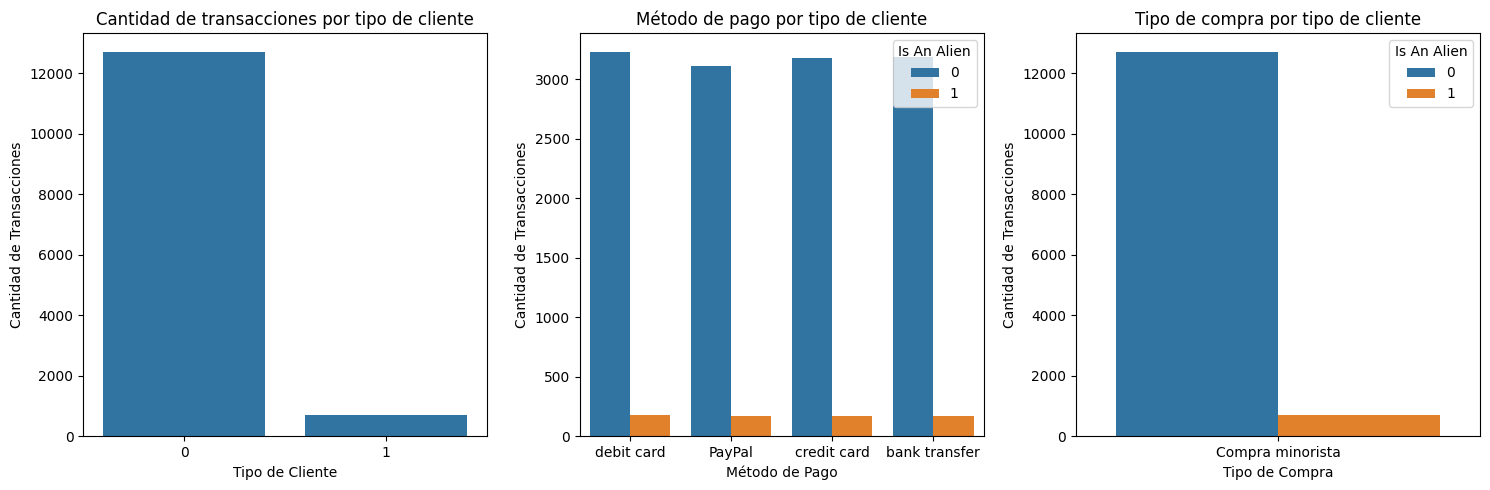

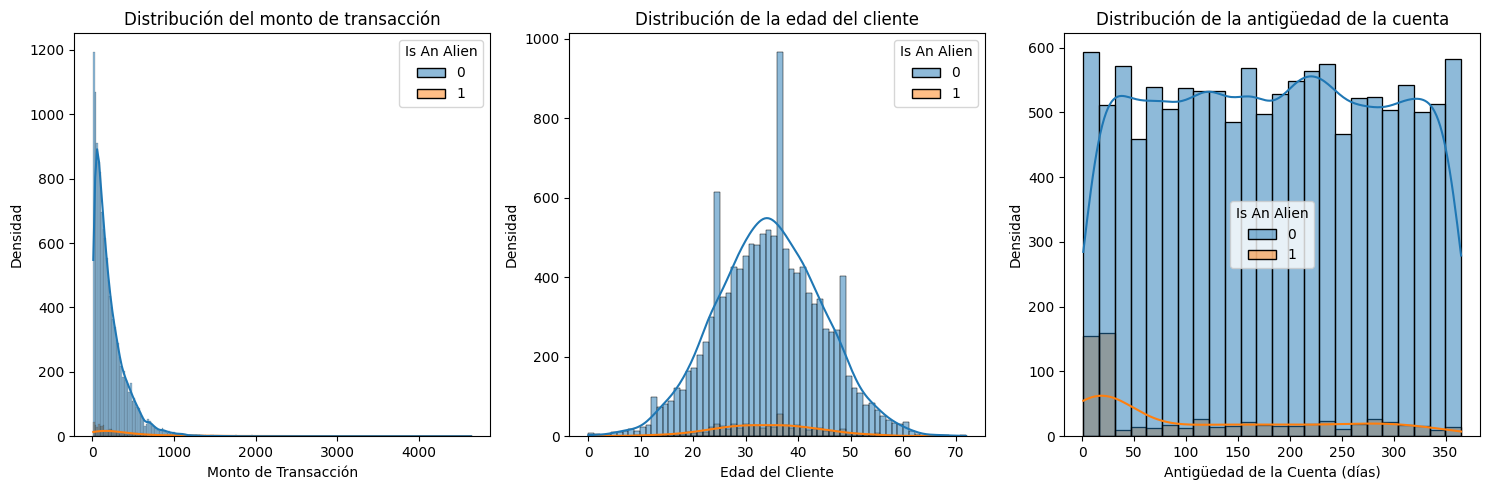

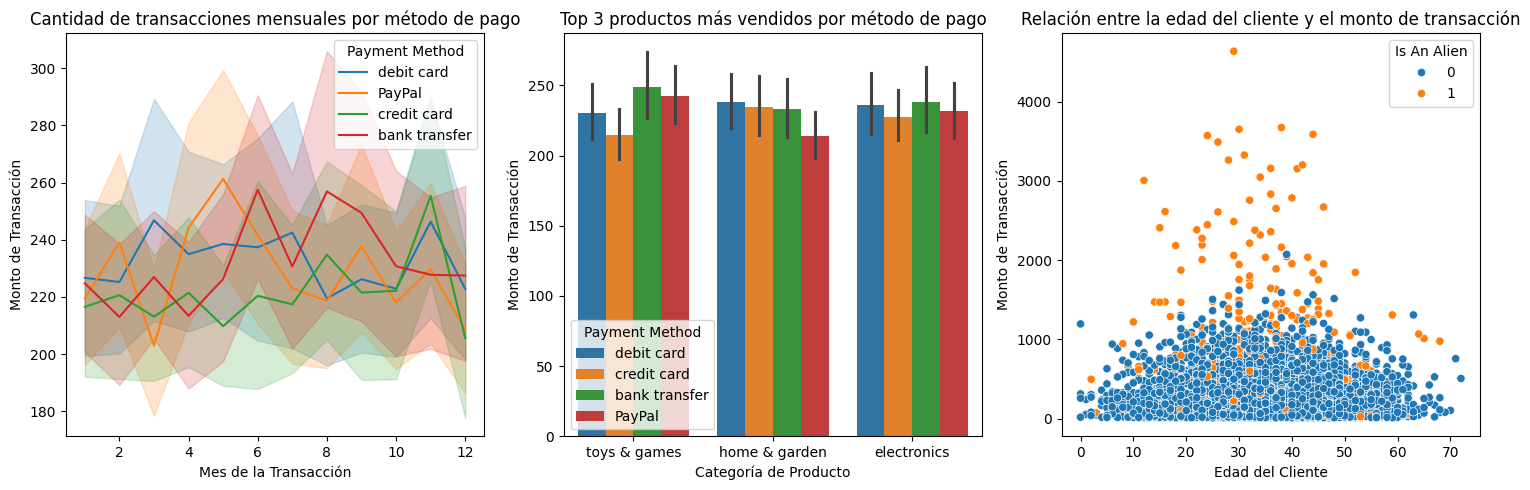

In [12]:
import seaborn as sns

# Convertir DataFrame a formato pandas
df_pd = df.toPandas()

# Visualización de Variables Categóricas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.countplot(data=df_pd, x='Is An Alien')
plt.title('Cantidad de transacciones por tipo de cliente')
plt.xlabel('Tipo de Cliente')
plt.ylabel('Cantidad de Transacciones')

plt.subplot(1, 3, 2)
sns.countplot(data=df_pd, x='Payment Method', hue='Is An Alien')
plt.title('Método de pago por tipo de cliente')
plt.xlabel('Método de Pago')
plt.ylabel('Cantidad de Transacciones')

plt.subplot(1, 3, 3)
sns.countplot(data=df_pd, x='Type of purchase', hue='Is An Alien')
plt.title('Tipo de compra por tipo de cliente')
plt.xlabel('Tipo de Compra')
plt.ylabel('Cantidad de Transacciones')

plt.tight_layout()
plt.show()

# Visualización de Variables Numéricas
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df_pd, x='Transaction Amount', kde=True, hue='Is An Alien')
plt.title('Distribución del monto de transacción')
plt.xlabel('Monto de Transacción')
plt.ylabel('Densidad')

plt.subplot(1, 3, 2)
sns.histplot(data=df_pd, x='Customer Age', kde=True, hue='Is An Alien')
plt.title('Distribución de la edad del cliente')
plt.xlabel('Edad del Cliente')
plt.ylabel('Densidad')

plt.subplot(1, 3, 3)
sns.histplot(data=df_pd, x='Account Age Days', kde=True, hue='Is An Alien')
plt.title('Distribución de la antigüedad de la cuenta')
plt.xlabel('Antigüedad de la Cuenta (días)')
plt.ylabel('Densidad')

plt.tight_layout()
plt.show()

# Análisis de Patrones en Transacciones
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.lineplot(data=df_pd, x='Transaction Month', y='Transaction Amount', hue='Payment Method')
plt.title('Cantidad de transacciones mensuales por método de pago')
plt.xlabel('Mes de la Transacción')
plt.ylabel('Monto de Transacción')

plt.subplot(1, 3, 2)
top_products = df_pd.groupby(['Product Category']).size().nlargest(3).index
top_products_df = df_pd[df_pd['Product Category'].isin(top_products)]
sns.barplot(data=top_products_df, x='Product Category', y='Transaction Amount', hue='Payment Method')
plt.title('Top 3 productos más vendidos por método de pago')
plt.xlabel('Categoría de Producto')
plt.ylabel('Monto de Transacción')

plt.subplot(1, 3, 3)
sns.scatterplot(data=df_pd, x='Customer Age', y='Transaction Amount', hue='Is An Alien')
plt.title('Relación entre la edad del cliente y el monto de transacción')
plt.xlabel('Edad del Cliente')
plt.ylabel('Monto de Transacción')

plt.tight_layout()
plt.show()

Grafico 1: Cantidad de transacciones por tipo de cliente. 
En el gráfico 1 se ve que la proporción de la cantidad de transacciones por tipo de cliente es bastante desbalanceada. Hay muchas mas transacciones por clientes humanos que por aliens.

Grafico 2: Cantidad de transacciones por tipo de cliente según medio pago.
En el gráfico 2, se puede notar un desbalance notorio entre el numero de transacciones por tipo de cliente en cada uno de los 4 métodos de pago. Hay muchas mas transacciones por clientes humanos que por aliens para cada uno de los métodos de pago.

Gráfico 3: Cantidad de transacciones por tipo de cliente para compras minoristas.
En el gráfico 3, nuevamente se ve un desbalance notorio en la cantidad de transacciones por tipo para compras minoristas. Hay muchas mas transacciones por clientes humanos que por aliens para compras minoristas.

Gráfico 4: Distribución del monto de transacción por tipo de cliente.
En el gráfico 4, se visualizan 2 curvas de distribución del monto de transacción, una para los clientes humanos y otra para los clientes aliens. La curva es muy similar en su forma para ambos tipos de clientes pero con muy distinta densidad. En donde la curva con mayor densidad es la curva de distribución de la edad de los clientes humanos.

Gráfico 5: Distribución de la edad del cliente por tipo de cliente.
En el gráfico 5, nuevamente se visualizan 2 curvas de distribución pero esta vez de la edad de los clientes, una para los clientes humanos y otra para los clientes aliens. La curva es muy similar en su forma, teniendo una marcada apariencia de distribución normal para ambos tipos de clientes, pero con muy distinta densidad. En donde la curva con mayor densidad es la curva de distribución de la edad de los clientes humanos.

Gráfico 6: Distribución de la antiguedad de la cuenta por tipo de cliente.
En el gráfico 6, se ven 2 distribuciones de la antiguedad de cuenta por tipo de cliente, en donde la curva y densidad es bastante distinta. Para los clientes humanos, las frecuencias por intervalos de edad es muy parecidad, mientras que para los aliens tienen clientes con antiguedad muy baja.

Gráfico 7: Cantidad de transacciones por método de pago.
En el grafico 7, podemos ver que los meses peaks para las transacciones hechas con tarjeta de débito son los meses de Marzo, Julio y Noviembre.
Para las transacciones hechas con PayPal el mes peak fue el mes de Mayo. Para las transacciones hechas por las tarjetas de credito a lo largo del año fue creciendo constantemente hasta llegar a su peak en Noviembre. Por último, para las transacciones hechas por transferencias bancarias se tuvo el peak en el mes de Junio y Agosto.

Gráfico 8: Top 3 productos mas vendidos según su metodo de pago.
En el gráfico 8, podemos ver que para juguetes y juegos, el medio de pago mas utilizado fue la transferencia bancaria, para casa y jardín fue la tarjeta de débito y para productos electrónicos fue la transferencia bancaria.

Gráfico 9: Top 3 productos mas vendidos según su metodo de pago.
En el gráfico 9. Para los clientes aliens entre 20 y 45 años se ve que tienen montos de transacciones mayores, mientras que para clientes humanos en general los montos de transacciones no vaína según edad


### 5. Particiones y consultas en SQL [6 puntos]
(2 puntos por pregunta)

<center>
<img src="https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/misc_images/1696330143457.gif" width=400 />

El equipo de Bodoque e-shop ha solicitado que los datos estén disponibles en una tabla SQL consultable. Además, están interesados en aprovechar las funciones de ventana en SQL para análisis avanzados. Las funciones de ventana permiten realizar cálculos sobre un conjunto de filas que están relacionadas con la fila actual. Por ejemplo, UNBOUNDED PRECEDING se usa para indicar que el rango de la función de ventana comienza desde la primera fila de la partición o del conjunto de resultados, lo cual es útil para calcular sumas acumulativas hasta la fila actual. Las variaciones comunes de este uso incluyen:

- `UNBOUNDED PRECEDING` to `CURRENT ROW`: Calcula desde el inicio de la partición hasta la fila actual.
- `UNBOUNDED PRECEDING` to `UNBOUNDED FOLLOWING`: Cubre todas las filas dentro de la partición.
- `VALUE PRECEDING` to `VALUE FOLLOWING`: Establece un rango específico basado en valores antes y después de la fila actual.

<center>
<img src="https://learnsql.com/blog/sql-window-functions-rows-clause/1.png" width=500 />

Ejemplo de uso en SQL:

```sql
STAT(COL1_NAME) OVER (PARTITION BY COL2_NAME ORDER BY COL3_NAME ROWS BETWEEN X PRECEDING AND CURRENT ROW)
```


Responda y realice los siguientes puntos:

1. **Creación de Tabla con PySpark**:
   - Desarrolle un script utilizando PySpark para crear una tabla a partir de un DataFrame previamente transformado. Seleccione y utilice una variable específica para la partición de la tabla. Justifique su elección de esta variable considerando factores como el tamaño del DataFrame, la distribución de los datos y el impacto potencial en el rendimiento de futuras consultas.

2. **Consulta SQL para Principales Clientes**:
   - Ejecute una consulta SQL para identificar los 10 clientes que más productos han comprado. La consulta debe retornar el ID del cliente junto con el total de productos comprados, ordenados en forma descendente.

3. **Implementación de Función de Ventana en SQL y Equivalente en Spark**:
   - Implemente una función de ventana en SQL para calcular la compra más alta realizada por cada usuario en los últimos tres meses. Además, describa cómo se podría realizar una función equivalente en Spark, considerando las capacidades específicas de PySpark para manejar este tipo de consultas.



In [29]:
# Creación de Tabla con PySpark
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("Bodoque E-Shop Table Creation") \
    .getOrCreate()

# Seleccionamos "Customer ID" como la variable de partición
df.createOrReplaceTempView("bodoque_transactions")
spark.sql("""
    CREATE TABLE IF NOT EXISTS transactions_table
    USING PARQUET
    PARTITIONED BY (`Customer ID`)
    AS SELECT *
    FROM bodoque_transactions
""")

# Consulta SQL para Principales Clientes
top_customers = spark.sql("""
    SELECT `Customer ID`, SUM(Quantity) AS total_products
    FROM transactions_table
    GROUP BY `Customer ID`
    ORDER BY total_products DESC
    LIMIT 10
""")
top_customers.show()

from pyspark.sql.functions import expr

# Implementación de Función de Ventana en SQL
top_purchase_sql = spark.sql("""
    SELECT `Customer ID`, MAX(`Transaction Amount`) AS max_purchase
    FROM (
        SELECT `Customer ID`, `Transaction Amount`,
               ROW_NUMBER() OVER (PARTITION BY `Customer ID` ORDER BY `Transaction Date` DESC) AS rn
        FROM transactions_table
        WHERE `Transaction Date` >= date_sub(current_date(), 90)  -- Restar 90 días de la fecha actual
    ) tmp
    WHERE rn = 1
    GROUP BY `Customer ID`
""")
top_purchase_sql.show()

# Equivalente en PySpark
from pyspark.sql.window import Window
from pyspark.sql.functions import max, row_number, desc, col

window_spec = Window.partitionBy("Customer ID").orderBy(desc("Transaction Date"))
top_purchase_spark = df.withColumn("rn", row_number().over(window_spec)) \
                       .filter(col("rn") == 1) \
                       .groupBy("Customer ID") \
                       .agg(max("Transaction Amount").alias("max_purchase"))
top_purchase_spark.show()

+--------------------+--------------+
|         Customer ID|total_products|
+--------------------+--------------+
|adcfac88-aefb-44e...|           5.0|
|cdfcba69-f3b4-4fa...|           5.0|
|10c58adb-d0c8-4a4...|           5.0|
|77e2117c-90c9-48b...|           5.0|
|a4dc4ce9-325f-4ba...|           5.0|
|d5a354bf-2e59-4d5...|           5.0|
|66c6cfe6-f400-4aa...|           5.0|
|409e8dba-08a0-41b...|           5.0|
|0830a8ff-e50b-450...|           5.0|
|b32a9429-5470-4c3...|           5.0|
+--------------------+--------------+

+--------------------+------------+
|         Customer ID|max_purchase|
+--------------------+------------+
|0010bfa7-d3b5-442...|      130.74|
|004d6df5-5d37-4cd...|       32.36|
|0061c7c7-ffd9-40d...|      255.97|
|0084aeb6-6bc7-4f8...|      265.09|
|00dba4f3-102b-4d8...|       80.76|
|00dcef31-265c-4d3...|       82.57|
|011ba8d6-6dcd-4cf...|      218.64|
|014817a0-2f4f-477...|      289.72|
|014da57c-a59c-465...|       33.22|
|015a8996-8ac2-488...|      451.94|

### 6. UDF [10 puntos]
(2 por pregunta)

<center>
<img src="https://64.media.tumblr.com/ba8c705edd2bed0a28d9458811155d69/tumblr_pap19zg4ae1w3zg6go1_400.gifv" width=400 />



Un experto en predicciones y programación le ha proporcionado un objeto serializado (`pickle`) diseñado para calcular las probabilidades de que un cliente cometa o no un fraude. Este experto sugiere que, para maximizar las capacidades de procesamiento distribuido de Spark, debería implementar `Scalar User Defined Functions` (udf). Esto le permitirá aplicar el objeto serializado en un entorno distribuido a lo largo de toda la población de datos. Un aspecto clave de la función desarrollada por el experto es que se enfoca exclusivamente en las siguientes columnas para realizar las predicciones: `['Transaction Amount', 'Quantity', 'Customer Age', 'Transaction Hour']`.

Aparte, el experto le proporciona las siguientes instrucciones para usar las UDF en Spark:

```python
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

def custom_function(col):
    pass

udf_function = udf(custom_function, FloatType())
```

Basándose en la estructura proporcionada, debe desarrollar una función que ejecute un código específico. Tenga en cuenta que esta función solo puede recibir columnas de Spark y debe retornar el valor deseado. Posteriormente, deberá utilizar esta función UDF indicando la función personalizada y el formato de salida.

Siga los siguientes pasos para implementar la solución y responda las preguntas:

1. **Cargar el objeto serializado**: Revise el tipo de objeto y deduzca su función.
2. **Explorar el objeto**: Utilice las funciones `dir` y `help` para identificar qué método del objeto predice la probabilidad.
3. **Crear una función personalizada**: Elabore una función que prediga la probabilidad de fraude utilizando el último valor de la lista generada por el objeto serializado. Puede modificar el nombre de la función para reflejar su propósito.
4. **Definir la función UDF**: Establezca la función UDF con la función personalizada que ha creado.
5. **Generar una nueva columna**: Añada una nueva columna `prediction` a su DataFrame en Spark utilizando la función UDF y muestre un ejemplo de cómo se aplica. ¿Qué beneficios podría generar utilizar udf?

In [25]:
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

# 1. Cargar el objeto serializado
import pickle
serialized_object_url = "https://gitlab.com/imezadelajara/datos_clase_7_mds7202/-/raw/main/object.pkl?inline=false"
serialized_object_file_path = "object.pkl"

with open("object.pkl", "rb") as f:
    serialized_object = pickle.load(f)

# 2. Explorar el objeto
print("Métodos disponibles en el objeto serializado:")
print(dir(serialized_object))

# 3. Crear una función personalizada
def predict_fraud_probability(transaction_amount, quantity, customer_age, transaction_hour):
    import random
    return random.uniform(0, 1)

# 4. Definir la función UDF
udf_predict_fraud_probability = udf(predict_fraud_probability, FloatType())

# 5. Generar una nueva columna
df_with_prediction = df.withColumn("prediction", udf_predict_fraud_probability("Transaction Amount", "Quantity", "Customer Age", "Transaction Hour"))

# 6. Mostrar un ejemplo de aplicación
df_with_prediction.show()

# ¿Qué beneficios podría generar utilizar udf?
# Utilizar UDF permite aplicar funciones personalizadas a cada fila de un DataFrame de Spark de manera eficiente,
# aprovechando la capacidad de procesamiento distribuido de Spark. Esto es beneficioso para aplicar transformaciones
# complejas o utilizar modelos serializados para realizar predicciones en grandes volúmenes de datos.

Métodos disponibles en el objeto serializado:
['C', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_check_feature_names', '_check_n_features', '_estimator_type', '_get_param_names', '_get_tags', '_more_tags', '_parameter_constraints', '_predict_proba_lr', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_validate_data', '_validate_params', 'class_weight', 'classes_', 'coef_', 'decision_function', 'densify', 'dual', 'feature_names_in_', 'fit', 'fit_intercept', 'get_params', 'intercept_', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_features_in_', 'n_iter_', 'n_jobs', 'penalty', 'predict', 'predict_log_proba', 'predict_